## Chicago Traffic Crashes Analysis

### Read the CSV files containing the Chicago traffic crash data. Identify the column common to both files and merge them together on that column. Then display the total number of reported crashes.

In [1]:
import numpy as np
import pandas as pd

We can import the contents of the crashes.csv file by calling the read_csv() method and store it in a DataFrame, named df_crash.

We then repeat the same action for the crashes_vehicles.csv file, naming it df_vehicles. For the crashes_vehicles.csv file, we drop the ‘CRASH_DATE’ column as it is also included in the other file.

In [2]:
df_crash = pd.read_csv('crashes.csv', low_memory=False)

df_vehicles = pd.read_csv('crashes_vehicles.csv', low_memory=False).drop('CRASH_DATE', axis=1)

To combine the two DataFrames into a single DataFrame, we call the merge() method of pandas. 

Then, with a call to the reset_index() function we reset the DataFrame index.

In [3]:
df = pd.merge(df_crash, df_vehicles, on='CRASH_RECORD_ID').reset_index()

In [4]:
df.head()

,index,CRASH_RECORD_ID,CRASH_DATE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,LATITUDE,LONGITUDE,VEHICLE_ID,MAKE,LIC_PLATE_STATE,VEHICLE_TYPE
0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,7/10/2019 17:56,CLEAR,DAYLIGHT,TURNING,NaN,IMPROPER BACKING,41.919664,-87.773288,656940.0,GEO,IL,PASSENGER
1,1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,7/10/2019 17:56,CLEAR,DAYLIGHT,TURNING,NaN,IMPROPER BACKING,41.919664,-87.773288,656945.0,NISSAN,IL,PASSENGER
2,2,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,6/30/2017 16:00,CLEAR,DAYLIGHT,TURNING,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.741804,-87.740954,175818.0,NISSAN,IL,SPORT UTILITY VEHICLE (SUV)
3,3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,6/30/2017 16:00,CLEAR,DAYLIGHT,TURNING,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.741804,-87.740954,175827.0,"TOYOTA MOTOR COMPANY, LTD.",IL,PASSENGER
4,4,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,7/10/2020 10:25,CLEAR,DAYLIGHT,REAR END,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.773456,-87.585022,867994.0,TOYOTA,IL,PASSENGER


In [5]:
#Total number of reported crashes

print('The total number of reported crashes:', df['CRASH_RECORD_ID'].nunique())

The total number of reported crashes: 474262


### Change the ‘CRASH_DATE’ column to a date format. Drop observations that did not occur in 2018, 2019 or 2020 (other years have incomplete data).

In [6]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df_crash['CRASH_DATE'] = pd.to_datetime(df_crash['CRASH_DATE'])

In [7]:
df.head()

,index,CRASH_RECORD_ID,CRASH_DATE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,LATITUDE,LONGITUDE,VEHICLE_ID,MAKE,LIC_PLATE_STATE,VEHICLE_TYPE
0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,CLEAR,DAYLIGHT,TURNING,NaN,IMPROPER BACKING,41.919664,-87.773288,656940.0,GEO,IL,PASSENGER
1,1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,CLEAR,DAYLIGHT,TURNING,NaN,IMPROPER BACKING,41.919664,-87.773288,656945.0,NISSAN,IL,PASSENGER
2,2,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,2017-06-30 16:00:00,CLEAR,DAYLIGHT,TURNING,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.741804,-87.740954,175818.0,NISSAN,IL,SPORT UTILITY VEHICLE (SUV)
3,3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,2017-06-30 16:00:00,CLEAR,DAYLIGHT,TURNING,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.741804,-87.740954,175827.0,"TOYOTA MOTOR COMPANY, LTD.",IL,PASSENGER
4,4,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,CLEAR,DAYLIGHT,REAR END,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.773456,-87.585022,867994.0,TOYOTA,IL,PASSENGER


In [8]:
df_crash.head()

,CRASH_RECORD_ID,CRASH_DATE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,LATITUDE,LONGITUDE
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,CLEAR,DAYLIGHT,TURNING,NaN,IMPROPER BACKING,41.919664,-87.773288
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,2017-06-30 16:00:00,CLEAR,DAYLIGHT,TURNING,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.741804,-87.740954
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,CLEAR,DAYLIGHT,REAR END,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.773456,-87.585022
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,2020-07-11 01:00:00,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,Y,UNABLE TO DETERMINE,41.802119,-87.622115
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,2020-07-08 14:00:00,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NaN,UNABLE TO DETERMINE,NaN,NaN


In [9]:
df = df[(df['CRASH_DATE'] >= '2018-01-01') & (df['CRASH_DATE'] <= '2020-12-31')]

In [10]:
df_crash = df_crash[(df_crash['CRASH_DATE'] >= '2018-01-01') & (df_crash['CRASH_DATE'] <= '2020-12-31')]

### Display plot showing the number of crashes that occur for each hour of the day

In [11]:
#importing the necessary modules

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Setting the 'Hour' column

df['Hour'] = df['CRASH_DATE'].dt.hour

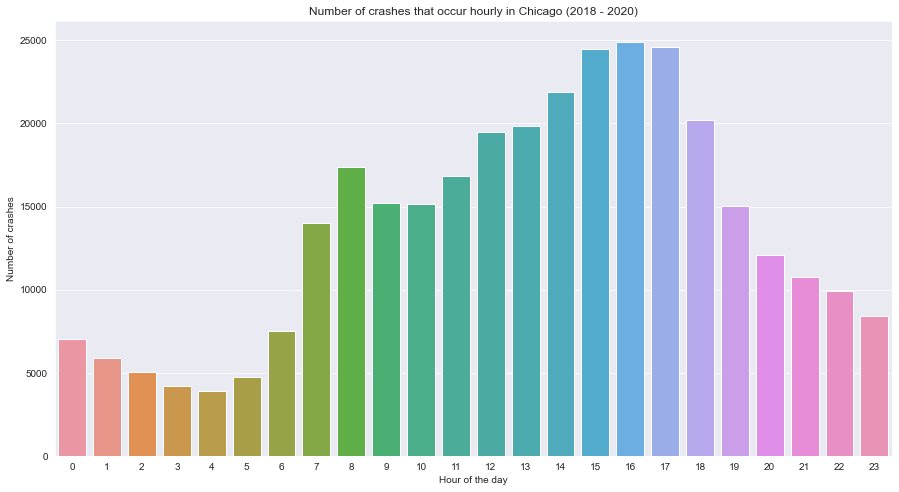

In [37]:
sns.set_style('darkgrid')

plt.figure(figsize=(15,8))

s = sns.barplot(
    data=df.groupby('Hour')['CRASH_RECORD_ID'].nunique().reset_index(), x='Hour', y='CRASH_RECORD_ID')

s.set_title('Number of crashes that occur hourly in Chicago (2018 - 2020)')
s.set_xlabel('Hour of the day')
s.set_ylabel('Number of crashes')
plt.show
plt.savefig('Hourly.png')

### Name the make of vehicle that was involved in the most daylight crashes in August 2018. Remember that a crash can involve multiple vehicles.

In [14]:
df.head(2)

,index,CRASH_RECORD_ID,CRASH_DATE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,LATITUDE,LONGITUDE,VEHICLE_ID,MAKE,LIC_PLATE_STATE,VEHICLE_TYPE,Hour
0,0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,CLEAR,DAYLIGHT,TURNING,NaN,IMPROPER BACKING,41.919664,-87.773288,656940.0,GEO,IL,PASSENGER,17
1,1,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,CLEAR,DAYLIGHT,TURNING,NaN,IMPROPER BACKING,41.919664,-87.773288,656945.0,NISSAN,IL,PASSENGER,17


In [15]:
#Subsetting the dataframe's LIGHTING_CONDITION to DAYLIGHT

df_day = df[df['LIGHTING_CONDITION'] == 'DAYLIGHT']

In [17]:
# Make of car involved in most accident during the day

df_day['MAKE'].value_counts().nlargest(1)

CHEVROLET    49779
Name: MAKE, dtype: int64

### Determine which weather condition was most prevalent for each type of crash.

The lambda function below calls the value_counts() method on each group (crash type) and counts the number of instances of each weather condition per group, in descending order

In [20]:
df_weather = df_crash.groupby('FIRST_CRASH_TYPE')['WEATHER_CONDITION'].apply(lambda x: x.value_counts())

print(df_weather)

FIRST_CRASH_TYPE                        
ANGLE             CLEAR                     27838
                  RAIN                       3626
                  SNOW                       1350
                  CLOUDY/OVERCAST            1262
                  UNKNOWN                     657
                                            ...  
TURNING           FOG/SMOKE/HAZE               93
                  SLEET/HAIL                   78
                  FREEZING RAIN/DRIZZLE        78
                  BLOWING SNOW                  9
                  SEVERE CROSS WIND GATE        2
Name: WEATHER_CONDITION, Length: 167, dtype: int64


In [29]:
# to get the weather that is most prevalent:

df_weather.reset_index(name='COUNT').rename(columns={'level_1':'WEATHER'}).head()

,FIRST_CRASH_TYPE,WEATHER,COUNT
0,ANGLE,CLEAR,27838
1,ANGLE,RAIN,3626
2,ANGLE,SNOW,1350
3,ANGLE,CLOUDY/OVERCAST,1262
4,ANGLE,UNKNOWN,657


The call to the head() method then gives us the top weather condition for each crash type group.

The reset_index() method to reset the DataFrame index to the original one. We use it here to present the results in a more elegant manner. We pass the name parameter of ‘COUNT’ to name the column containing the count values.

Finally, we call the rename() method to rename the level_1 column as WEATHER, to make the output more readable.

### Plot the primary contributing cause of reported crashes, from highest to lowest.

In [31]:
df_crash.head(2)

,CRASH_RECORD_ID,CRASH_DATE,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,LATITUDE,LONGITUDE
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,2019-07-10 17:56:00,CLEAR,DAYLIGHT,TURNING,NaN,IMPROPER BACKING,41.919664,-87.773288
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,2020-07-10 10:25:00,CLEAR,DAYLIGHT,REAR END,NaN,FAILING TO YIELD RIGHT-OF-WAY,41.773456,-87.585022


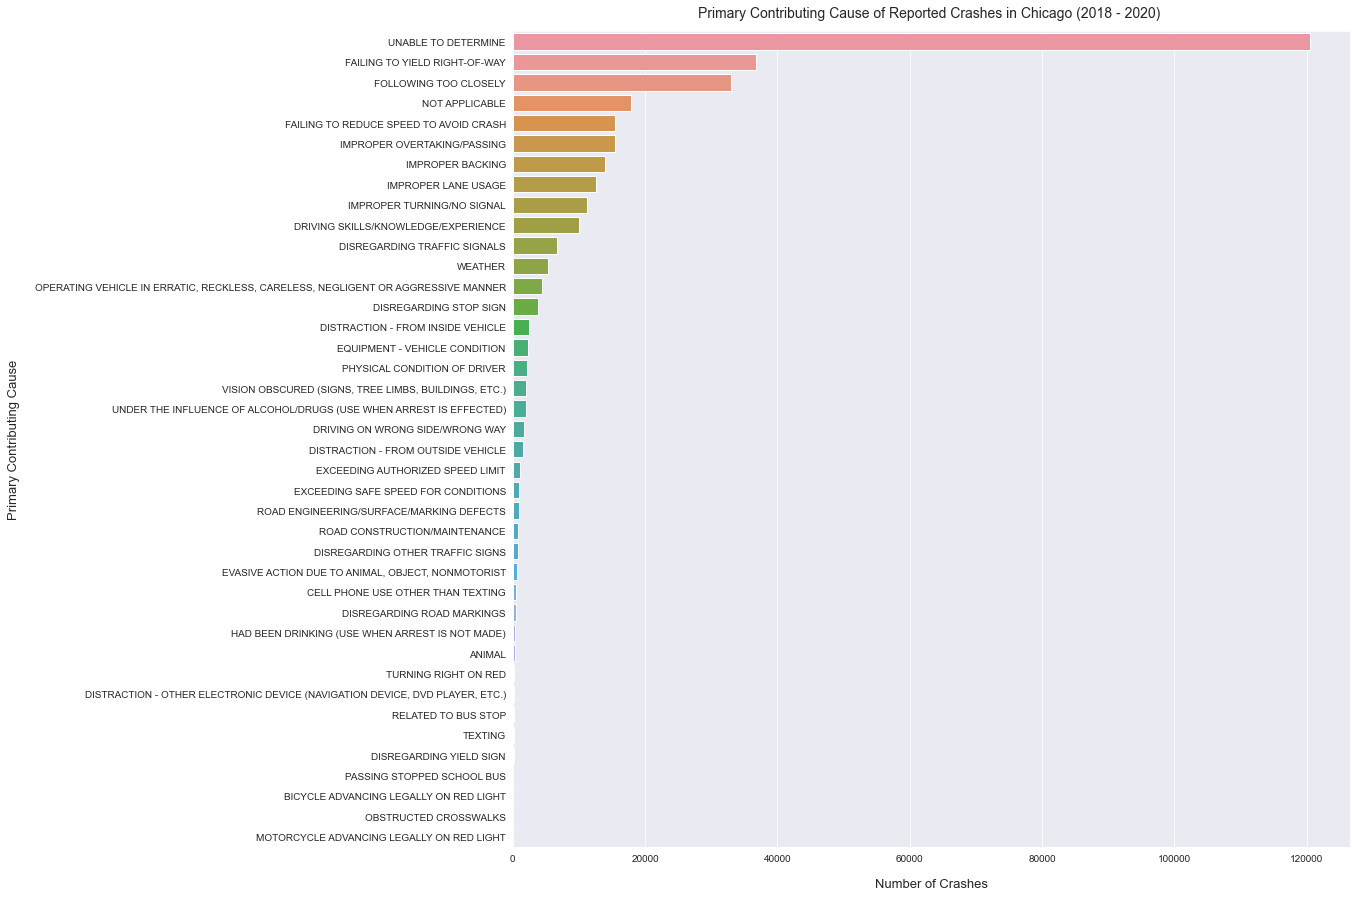

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(15, 15))
sns.countplot(data=df_crash,  y='PRIM_CONTRIBUTORY_CAUSE', order = df_crash['PRIM_CONTRIBUTORY_CAUSE'].value_counts().index)
plt.title('Primary Contributing Cause of Reported Crashes in Chicago (2018 - 2020) ', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=13, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=13, labelpad=15)
plt.show()
plt.savefig('PCC_Chicago.png')

### Display the 10 state license plates involved in the most crashes. Remember that a crash can involve multiple vehicles.

In [38]:
df.groupby('LIC_PLATE_STATE')['VEHICLE_ID'].count().nlargest(10).reset_index(name='COUNT')

,LIC_PLATE_STATE,COUNT
0,IL,550630
1,XX,12128
2,IN,11914
3,WI,3793
4,MI,2554
5,FL,1802
6,TX,1739
7,OH,1516
8,AZ,1333
9,IA,1121
